In [28]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\leowj\AppData\Local\Temp\ipykernel_27040\2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [29]:
# Create data

N = 30
x = torch.randn(N, 1) # create 30 random data points for x
y = x + torch.randn(N, 1) / 2 # create 30 random data points for y

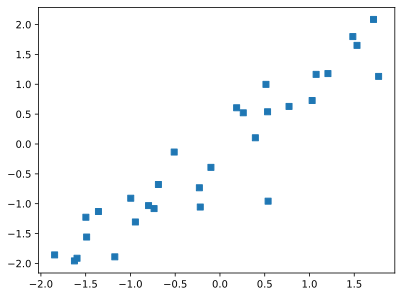

In [30]:
plt.plot(x, y, 's')
plt.show()

##### Purpose of Sequential()

In Pytorch & TensorFlow, Sequential() is a convenience feature used for building neural networks. It allows you to stack layers in a linear (sequential) order, meaning data flows through the layers, one after the other.

For more complex models involving multiple paths, conditional execution or non-linear connections, custom models need to be create manually.


In [31]:
# build model
ANNreg = nn.Sequential(
    # no. of inputs = 1 (x), no. of outputs = 1 (y)
    nn.Linear(1, 1, bias=True), # input layer (takes in input from the world)
    nn.ReLU(), # activation fn
    nn.Linear(1, 1, bias=True) # output layer
)

ANNreg
# bias = True: bias term added by default to that given layer (for each perceptron)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

##### Purpose of optimizers

- play a crucial role in training models by adjusting model's weights & biases to minimize loss function
- goal of optimizer is to find optimal set of model parameters (weights & biases) that reduce the difference between prediction & actual
- Optimizers uses algorithms based on gradient descent, where the gradient(slope) of the loss function is computed with respect to the model's parameters (weights & biases)
- Optimizers also control the speed of how fast / slow model's weights are updated by adjusting the learning rate dynamically during training. This ensures that the model converges efficiently without overshooting or stuck in local minima
- Optimizers are critical for ensuring deep learning models train effectively & converge to optimal soln.

##### Common Optimizers:

1. Stochastic Gradient Descent: Updates weights based on small batch of data (faster for large datasets)
2. Adaptive Moment Estimation: Combine benefits of momentum & RMSProp to adapt learning rate for each sets of weights / bias
3. RMSProp: adapts learning rate based on recent gradients, useful for dealing with non-stationary objects


In [32]:
# learning rate
lr = 0.1

# loss function
lossfun = nn.MSELoss()

# optimizer (Type of gradient descent to use)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)

In [33]:
# training model
numEpochs = 500
losses = torch.zeros(numEpochs)

for i in range(numEpochs):
    pred = ANNreg(x) # pass x into the model (Sequential layers)
    
    # compute loss
    loss = lossfun(pred, y) # MSE loss using pred & actual
    losses[i] = loss # save into loss array for visualization
    
    # backprop
    optimizer.zero_grad() # initialize all gradient descent to be 0
    loss.backward() # initiate backprop according to loss
    optimizer.step() # housekeeping step for gradient descent

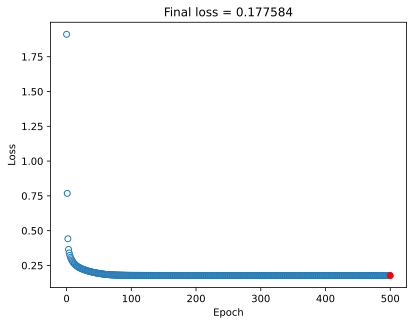

In [34]:
# perform prediction
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions - y).pow(2).mean()

# detach() is to simply get value from pytorch tensor
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numEpochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

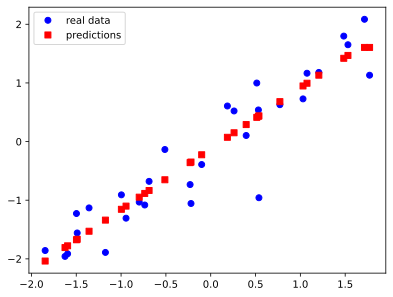

In [35]:
# plot data & prediction
plt.plot(x, y, 'bo', label='real data')
plt.plot(x, predictions.detach(), 'rs', label='predictions')
plt.legend()
plt.show()